In [6]:
import numpy as np
import pandas as pd
import scipy

from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Methods implementation

# Quality check

In [7]:
def accuracy(y, y_pred):
    return np.array([1 if y_pred[i] == y[i] else 0
                     for i in range(len(y))]).sum() / len(y)

#  Visualizing algorithms results

In [8]:
def plot_2d_dataset_class(data, colors=None): #data = [features, target]
    from numpy.random import rand
    features = np.array(data[0])
    target = np.array(data[1])
    n = len(set(target))
    if(colors == None):
        colors = ListedColormap([tuple(rand(3)) for i in range(n)])
    pyplot.figure(figsize(8, 8))
    pyplot.scatter(features[:,0], features[:,1], c = target, cmap = colors)

In [9]:
def print_result(coef, true, predict, cut = 5):
    print('w:\n',coef,'\n')
    print('true vs. prediction:\n',vstack((true,predict)).T[:cut],'\n...\n')
    print('accuracy: ',round(accuracy(true, predict),3))

In [10]:
def plot_for_one_feature(train_data, train_labels, w, title):
    n = 100
    x = np.linspace(train_data.min(), train_data.max(), n).reshape((n,1))
    plt.figure(figsize = (8,5))
    plt.plot(train_data, train_labels, 'o', markersize = 5)
    plt.plot(x, sigmoid(prediction(w, x)), '-', linewidth = 2)
    plt.xlabel('feature')
    plt.ylabel('label')
    plt.title(title)
    plt.show()

In [11]:
def plot_for_two_feature(data, labels, w, title, mean_std = True):
    plot_2d_dataset_class([data, labels])
    if mean_std:
        mean = data.mean(axis = 0)[0]
        std = data.std(axis = 0)[0]
        x = np.linspace(mean - std, mean + std, 2).reshape((2,1))
    else:    
        x = np.linspace(data.min(axis = 0)[0], data.max(axis = 0)[0], 2).reshape((2,1))
    y = - w[0] / w[2] - w[1] / w[2] * x
    plt.plot(x, y, '-', linewidth = 4)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    plt.title(title)
    plt.show()

# Data

### Generate / Import dataset

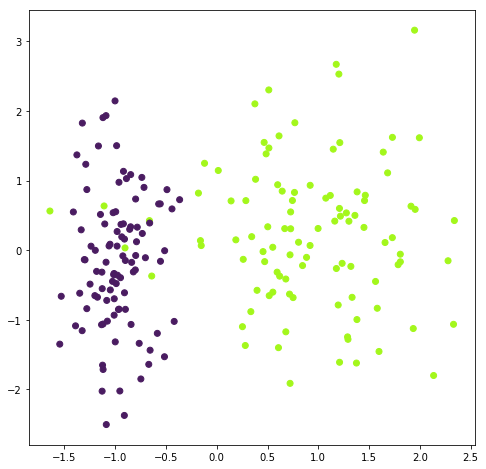

In [92]:
from sklearn import datasets
sample_size = 200
data, target = datasets.make_classification(n_samples=sample_size, n_features=2, 
                                            n_informative=1, n_redundant=0, 
                                            n_repeated=0, n_classes=2, 
                                            n_clusters_per_class=1, 
                                            weights=None, flip_y=0.01, 
                                            class_sep=1.0, hypercube=True, 
                                            shift=0.0, scale=1.0, 
                                            shuffle=True, random_state=2)
plot_2d_dataset_class([data, target])
plt.show()

### Split dataset into train & test samples

In [204]:
from sklearn import cross_validation

train_data, \
test_data, \
train_labels, \
test_labels = cross_validation.train_test_split(data, target, test_size = 0.3)

In [205]:
print('train_data: \n',train_data[:5],'\n...\n')
print('train_labels: \n',train_labels[:5],'...')

train_data: 
 [[-0.80232185 -0.28351952]
 [-1.4127401   0.54894656]
 [ 0.38185178  1.01871705]
 [ 0.51207942  2.30237829]
 [ 0.72731951  0.54938447]] 
...

train_labels: 
 [1 0 0 1 0] ...


In [214]:
for x in train_data[:5].T:
    print(x.dtype)

float64
float64


In [211]:
train_data[:,0].dtype

dtype('float64')

# Run models and output

In [239]:
def a_posteriori_probab_categ(x,y):
    label_set = list(set(y))
    feature_set = list(set(x))
    a_posteriori = dict()
    for label in label_set:
        label_x = [x[i] for i in range(len(y)) if y[i] == label]
        a_posteriori[label] = dict()
        for feature in feature_set:
            a_posteriori[label][feature] = len(np.where(label_x == feature)[0]) / len(np.where(y == label)[0])
    return a_posteriori

def a_posteriori_probab(x,y,type_x_i): # x is one feature sample, y is target
    if type_x_i == 'int64':
        return a_posteriori_probab_categ(x,y)
    
    elif type_x_i == 'float64':
        pass
    
    elif type_x_i == 'categ':
        return a_posteriori_probab_categ(x,y)
    
    elif type_x_i == 'str':
        feature_set = list(set(x))
        new_x = np.array((len(feature_set),))
    
    else:
        raise
    return a_posteriori

def a_priori_probab(y):
    label_set = set(y)
    a_priori = dict()
    for label in label_set:
        a_priori[label] = len(np.where(y == label)[0]) / len(y)
    return a_priori

def naive_bayes_classifier(X, y):
    a_priori = a_priori_probab(y)
    for x in X.T:
        a_posteriori = a_posteriori_probab(x,y,x.dtype)
    return

def naive_hypothesis():
    return

In [201]:
naive_bayes_classifier(train_data, train_labels)

In [202]:
x = copy(target[:15])
np.random.shuffle(x)
y = copy(target[:15])

a_posteriori_probab(x,y,'bin')

{0: {0: 0.2857142857142857, 1: 0.7142857142857143}, 1: {0: 0.625, 1: 0.375}}

In [199]:
np.vstack((x,y))

array([[0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]])

In [216]:
y.dtype

dtype('int64')

In [226]:
x = np.array(['hello','hi','hello'])

In [247]:
feature_set = list(set(x))
new_x = np.zeros((len(x),len(feature_set)))
i = 0
for feature in feature_set:
    print(new_x[:,i])
    i += 1

[ 0.  0.  0.]
[ 0.  0.  0.]


In [246]:
feature_set

['hello', 'hi']